#### 판다스 내장 그래프 도구
Pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있습니다. 다양한 종류의 그래프를 그릴 수 있으며, 각 그래프는 데이터를 시각화하는 데 유용한 정보를 제공합니다.
- 선 그래프 (Line Plot) :
가장 기본적인 선 그래프를 그리며, 시간에 따른 데이터 변화를 시각화하는 데 유용합니다.
- 막대 그래프 (Bar Plot) :
카테고리형 데이터를 시각화하는 데 유용합니다.
- 수평 막대 그래프 (Horizontal Bar Plot) :
카테고리형 데이터를 수평으로 시각화하며, 누적 옵션과 투명도 적용이 가능합니다.
- 히스토그램 (Histogram) :
데이터의 분포를 시각화하는 데 유용합니다.
- 산점도 (Scatter Plot) :
두 변수 간의 관계를 시각화하며, 상관관계를 확인할 수 있습니다.
- 박스 플롯 (Box Plot) :
데이터의 분포와 분산 정도를 시각화하며, 이상치(outliers)를 확인하는 데 유용합니다.
- 면적 그래프 (Area Plot)
면적 그래프는 시간에 따른 데이터의 변화를 누적하여 시각화하는 데 유용합니다. 여러 시계열 데이터를 하나의 플롯에 그릴 수 있으며, 누적된 값의 변화를 시각적으로 쉽게 파악할 수 있습니다.
- 파이 차트 (Pie Chart) :
카테고리형 데이터의 비율을 시각화하는 데 유용합니다.
- 커널 밀도 추정 그래프 (KDE Plot) :
데이터의 확률 밀도 함수를 시각화하며, 데이터의 분포를 부드럽게 나타냅니다.

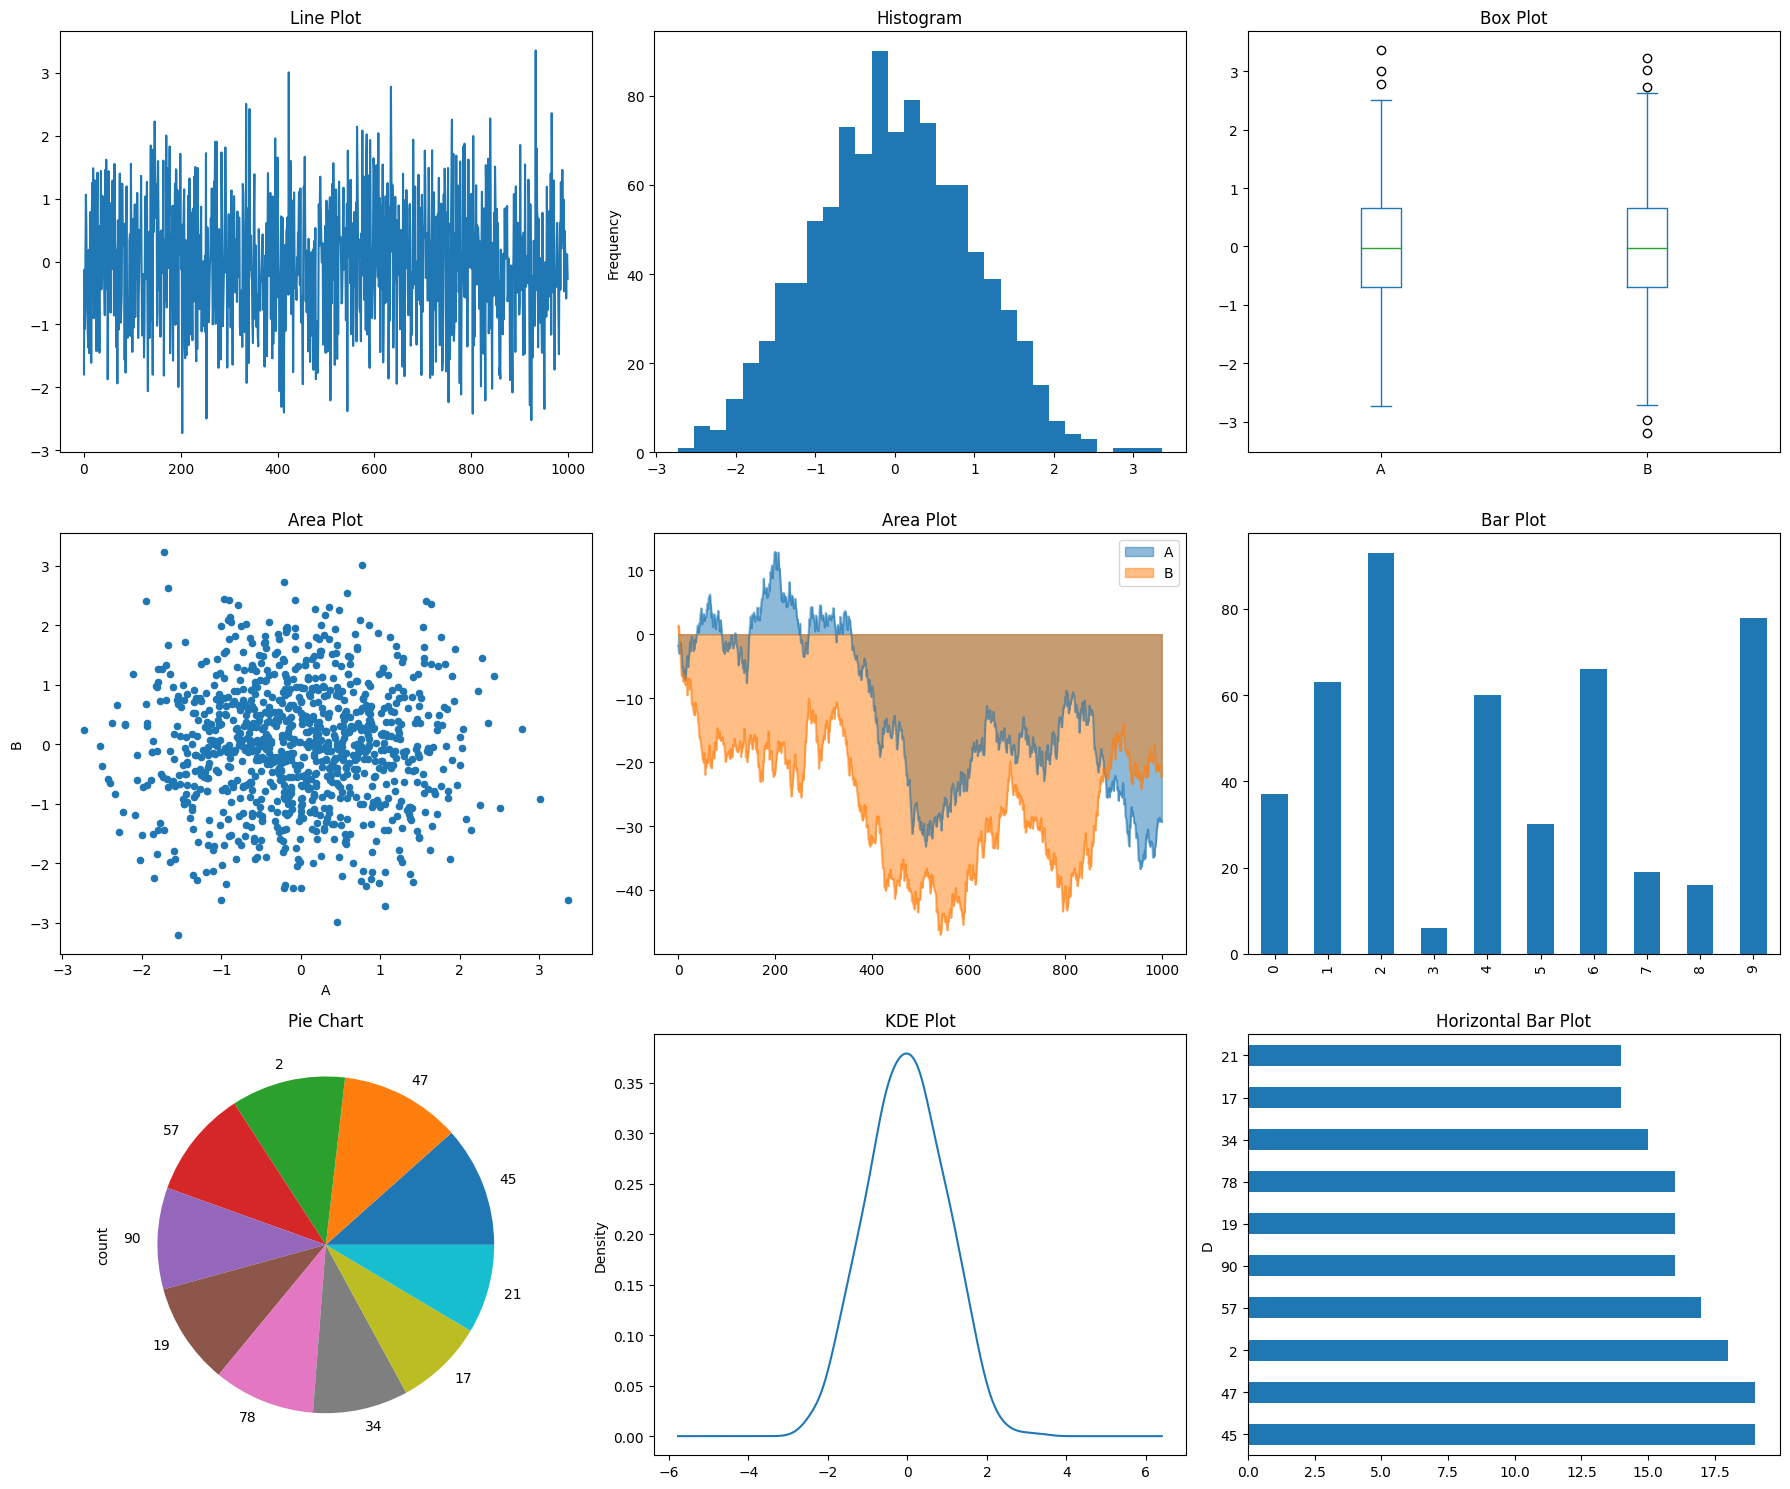

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed()
df = pd.DataFrame({
    'A' : np.random.randn(1000),
    'B' : np.random.randn(1000),
    'C' : np.random.rand(1000) * 100,
    'D' : np.random.randint(1,100,1000),
})

# 데이터프레임을 3행 3열 형태로 플롯
fig, axes = plt.subplots(3,3,figsize=(18,15))

# 라인 플롯
df['A'].plot(ax=axes[0,0], title='Line Plot')

# 히스트로그램
df['A'].plot(kind='hist',bins=30,ax=axes[0,1],title='Histogram')

# 박스 플롯
df[['A','B']].plot(kind='box', ax=axes[0,2], title='Box Plot')

# 산점도
df.plot(kind='scatter', x ='A',y='B', ax =axes[1,0],title='Area Plot',stacked=False)

# 면적 그래프(stacked=Falses는 두 시리즈가 겹치지 않도록 하는 옵션)
df[['A','B']].cumsum().plot(kind='area',ax=axes[1,1],title='Area Plot',stacked=False)

# 막대 그래프(상위 10개)
df['D'].head(10).plot(kind='bar',ax=axes[1,2],title='Bar Plot')

# 파이 파트
df['D'].value_counts().head(10).plot(kind='pie',ax=axes[2,0],title='Pie Chart')

# 커널 밀도 추정 그래프
df['A'].plot(kind='kde',ax=axes[2,1], title='KDE Plot')

# 수평 막대 그래프
df['D'].value_counts().head(10).plot(kind='barh',ax=axes[2,2],title='Horizontal Bar Plot')

# f레이아웃 조정
plt.tight_layout()
plt.show()

Q 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임 생성,
통계 요약표 및 시각화를 수행하세요 (컬럼명 : Num)

        Num
0 -1.621300
1  1.618130
2 -1.178003
3 -1.163772
4  0.094524 

                Num
count  10000.000000
mean      -0.015057
std        1.009908
min       -3.721909
25%       -0.708102
50%       -0.003121
75%        0.673186
max        4.124762 

Axes(0.125,0.11;0.775x0.77)


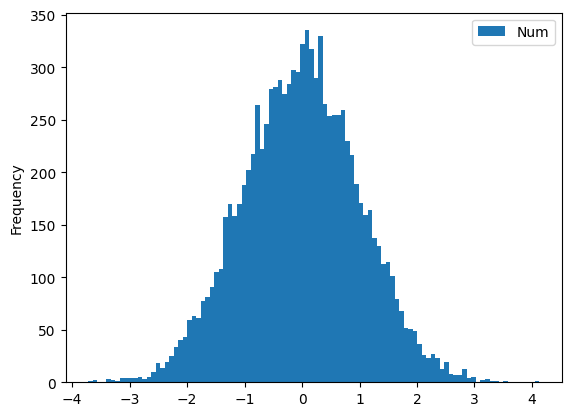

In [ ]:
data = np.random.randn(10000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head(),'\n')
print(df.describe(),'\n')
print(df.plot(kind='hist',bins=100))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<Axes: ylabel='Frequency'>

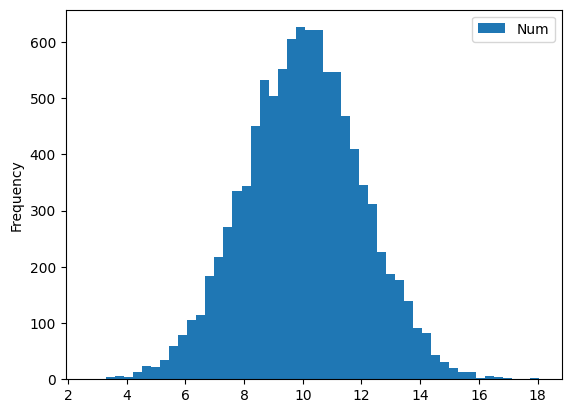

In [ ]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=10000)
df1= pd.DataFrame(sample1,columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist',bins=50)

In [ ]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns = ['A','B','C','D'])
print(df)

              A         B         C         D
one    0.919122  0.169110  0.929848  0.150823
two    0.135593  0.995470  0.842857  0.680344
three  0.843496  0.041681  0.404026  0.581456
four   0.670009  0.621954  0.871499  0.552468
five   0.834455  0.384325  0.890471  0.171193
six    0.309035  0.148954  0.712060  0.927528


Q 아래 df에 대하여 수직 막대그래프, 수평 막대그래프, 수직 스택 막대그래프, 수평 스택 막대그래프를 작성하세요

In [ ]:
# 샘플 데이터 생성
df = pd.DataFrame(np.random.rand(8,3),
                  index=['P1','P2','P3','P4','P5','P6','P7','P8'],
                  columns=pd.Index(['A','B','C'], name='Species'))
df

Species,A,B,C
P1,0.834989,0.070891,0.353019
P2,0.873102,0.351246,0.989064
P3,0.315830,0.306787,0.875812
P4,0.579594,0.295949,0.185974
P5,0.822583,0.856833,0.728582
P6,0.321001,0.631848,0.572933
P7,0.480921,0.026481,0.520964
P8,0.230016,0.465778,0.044200


<Axes: >

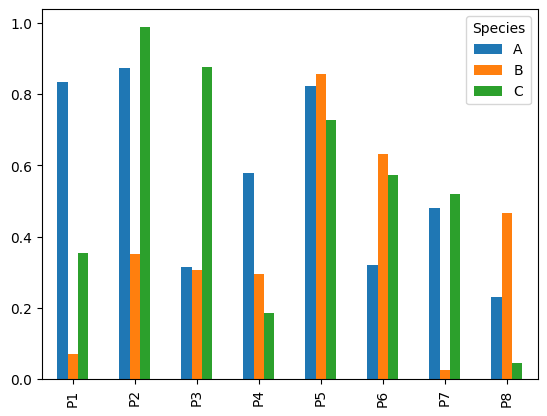

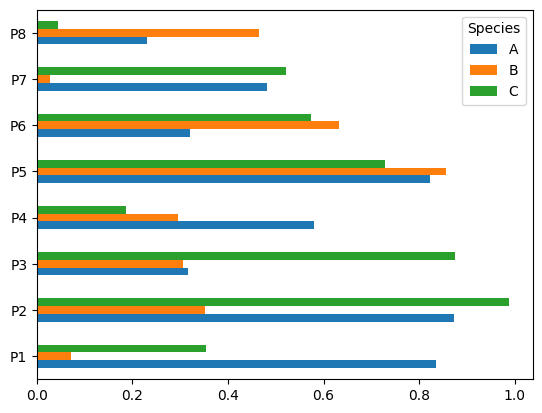

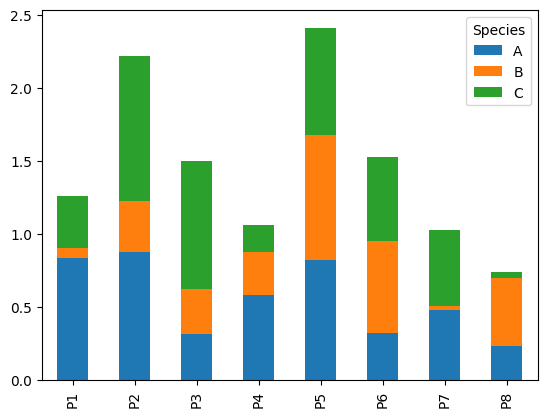

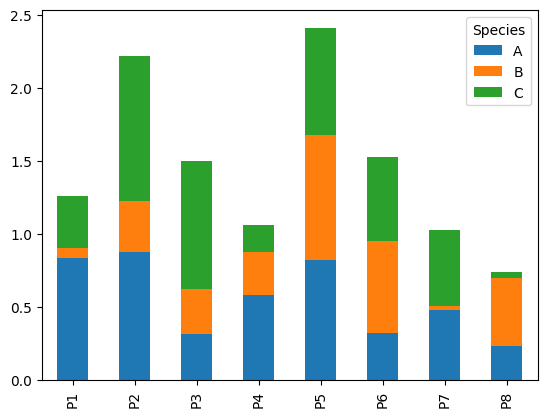

In [ ]:
df.plot(kind='bar')
df.plot(kind='barh')
df.plot(kind='bar',stacked=True)
df.plot(kind='bar',stacked=True)

subplots(nrows=4,ncols=1,figsize=(12,18))

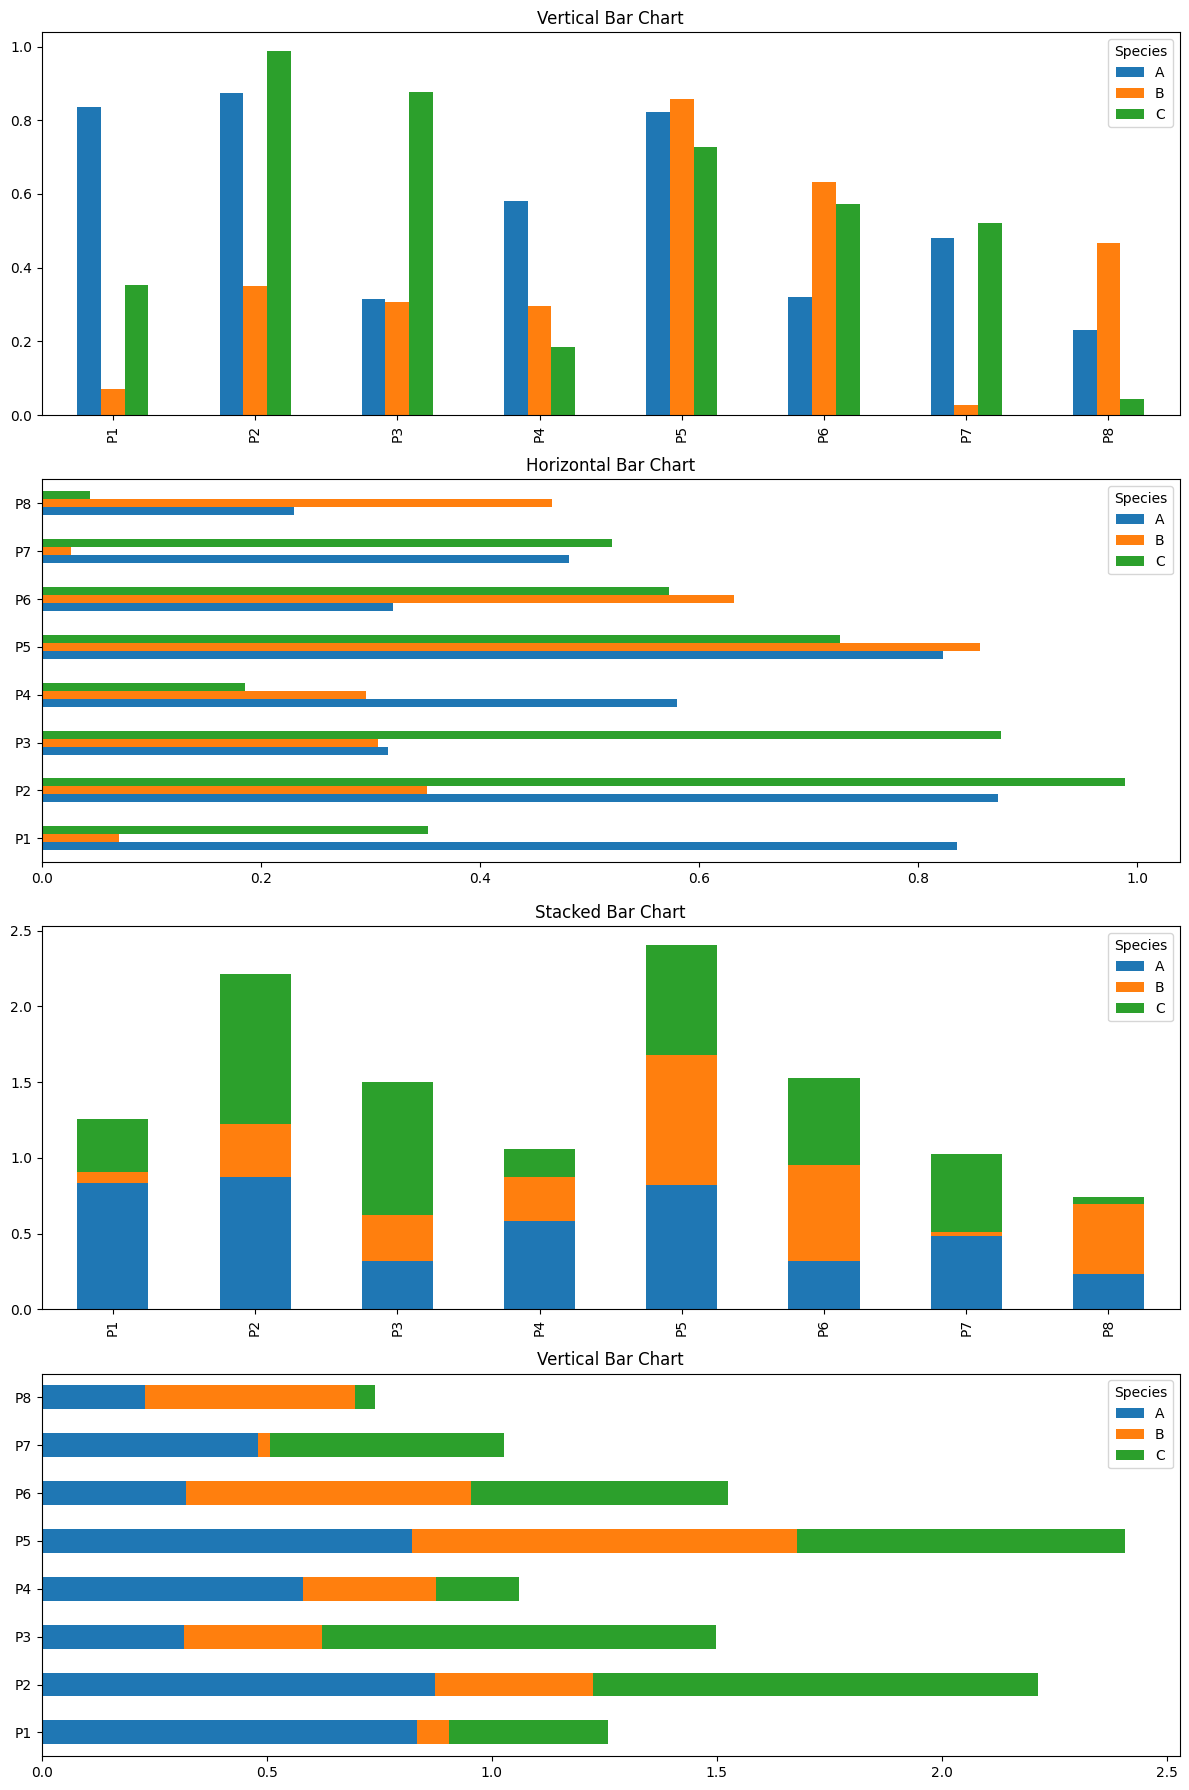

In [ ]:
fig,axes = plt.subplots(nrows= 4, ncols=1,figsize=(12,18))

# 수직 막대그래프 (Vertical Bar Chart)
df.plot(kind='bar',ax=axes[0])
axes[0].set_title('Vertical Bar Chart')

# 수평 막대그래프 (Horizontal Bar Chart)
df.plot(kind='barh',ax=axes[1])
axes[1].set_title('Horizontal Bar Chart')

# 수직 스택 막대그래프 (Stacked Bar Chart)
df.plot(kind='bar',stacked=True,ax=axes[2])
axes[2].set_title('Stacked Bar Chart')
# 수평 스택 막대그래프 (Stacked Bar Chart)
df.plot(kind='barh',stacked=True,ax=axes[3])
axes[3].set_title('Vertical Bar Chart')

plt.tight_layout()
plt.show()

<Axes: >

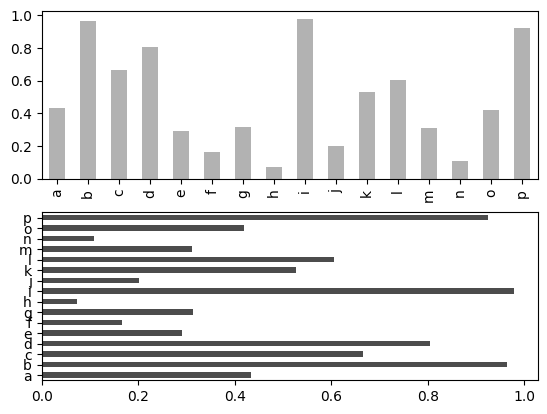

In [ ]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.3)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

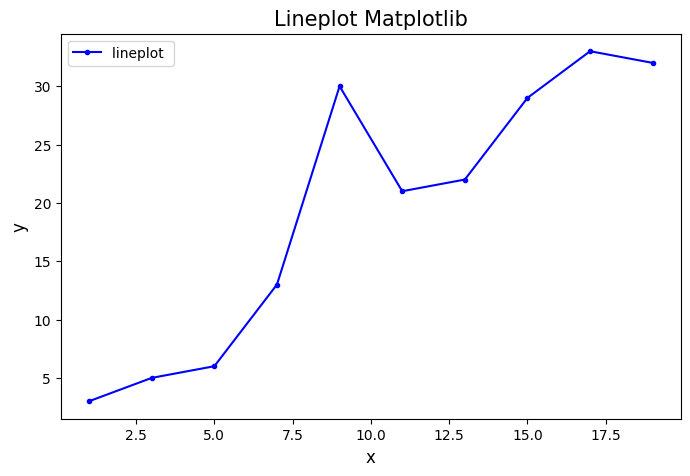

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,5))
plt.plot(x,y,color='blue',marker='o',markersize=3)
plt.title('Lineplot Matplotlib',size=15)
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.legend(labels=['lineplot '])

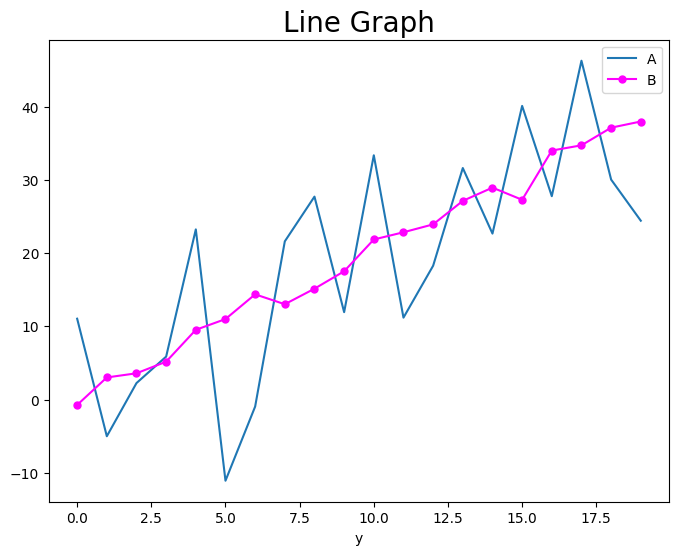

In [ ]:
np.random.seed()
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
# y1 = np.arange(20)*2
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o',markersize=5)
plt.xlabel('x',size=10)
plt.xlabel('y',size=10)
plt.title('Line Graph',size=20)
plt.legend(['A','B'])

range(0, 10)
[7 6 2 9 9 4 7 3 6 8]


Text(0.5, 0, 'x')

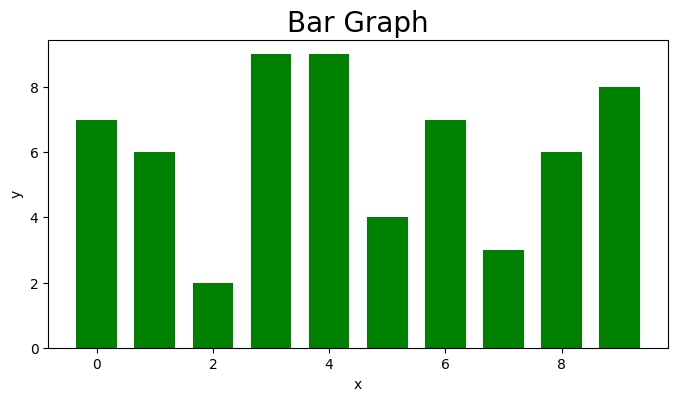

In [ ]:
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.7,color='green')
plt.title('Bar Graph',size=20)
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


Text(0.5, 0, 'mpg')

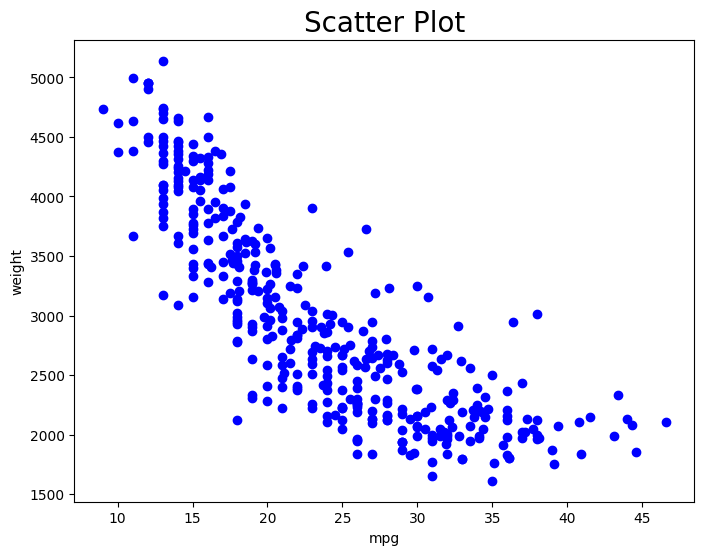

In [ ]:
# scattrt plot
df_auto = pd.read_excel('auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')
plt.title('Scatter Plot',size=20)
plt.ylabel('weight')
plt.xlabel('mpg')

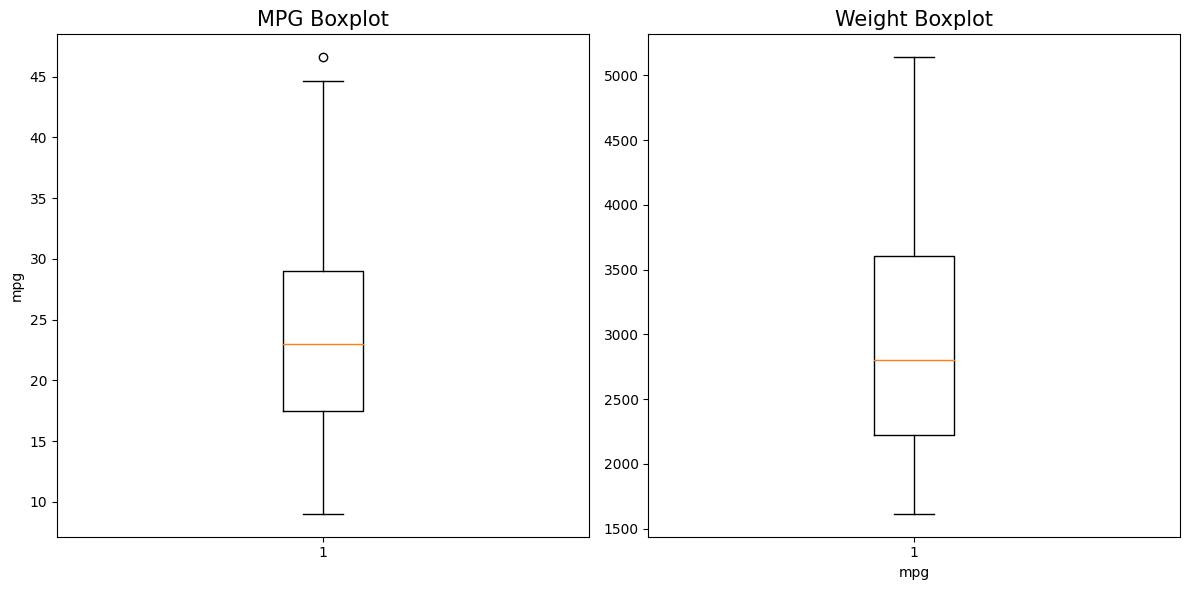

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_auto.mpg)
plt.title('MPG Boxplot',size=15)
plt.ylabel('mpg')

plt.subplot(1,2,2)
plt.boxplot(df_auto.weight)
plt.title('Weight Boxplot',size=15)
plt.xlabel('mpg')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'count')

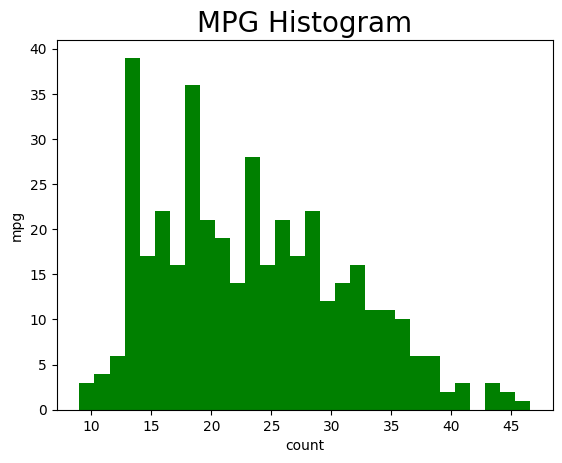

In [ ]:
# histogram
plt.hist(df_auto.mpg,bins=30,color='green')
plt.title('MPG Histogram',size=20)
plt.ylabel('mpg')
plt.xlabel('count')

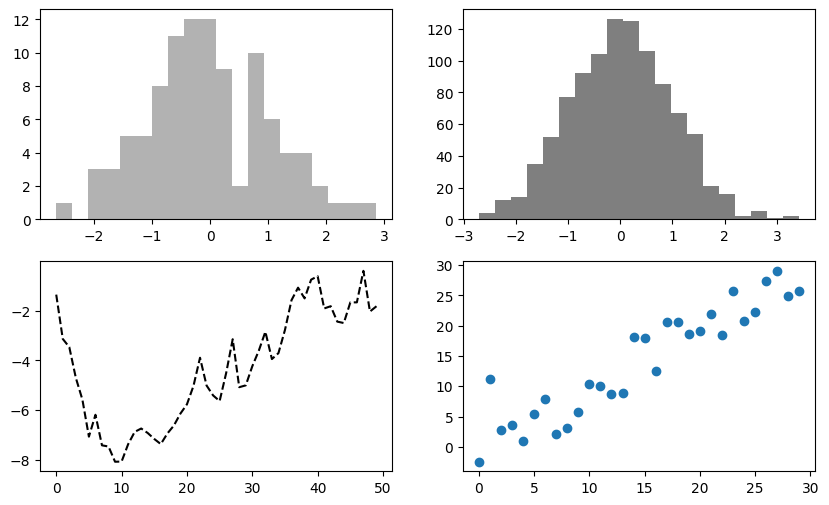

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='k',alpha = 0.3)
ax2.hist(np.random.randn(1000), bins=20, color='k',alpha = 0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

Task1_0617. 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

<BarContainer object of 10 artists>

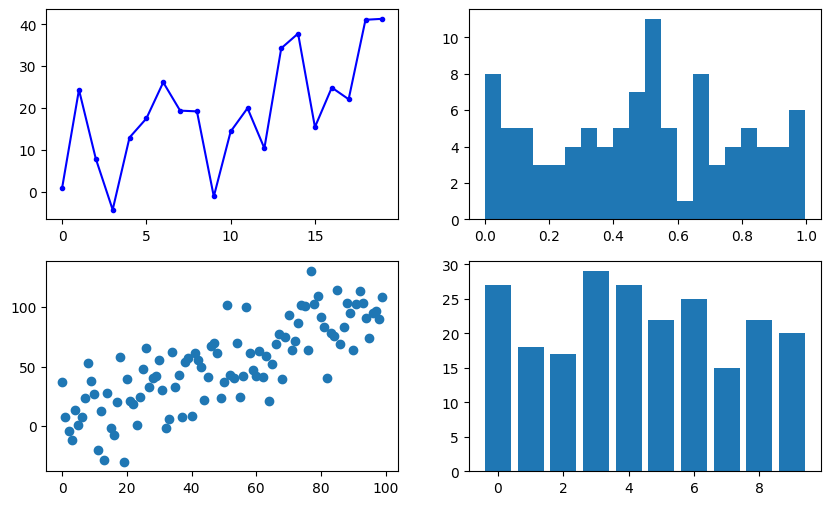

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(np.arange(20),(np.arange(20)*2 + np.random.randn(20)*10),color='blue',marker='o',markersize=3)
ax2.hist(np.random.rand(100), bins =20)
ax3.scatter(x = np.arange(100),y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30,10))

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0.5, 0, 'mpg')

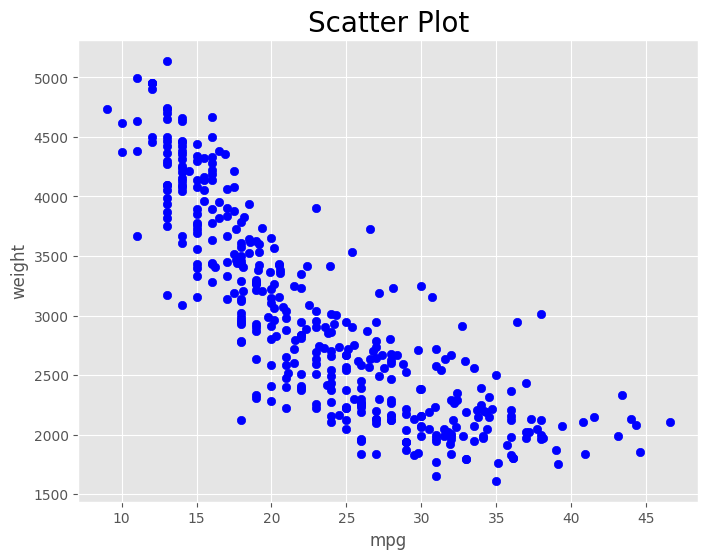

In [ ]:
plt.style.use('ggplot')
x = df_auto['mpg']
y = df_auto['weight']

plt.figure(figsize=(8,6))
plt.scatter(x,y,color = 'blue')
plt.grid(True)
plt.title('Scatter Plot',size=20)
plt.ylabel('weight')
plt.xlabel('mpg')

In [6]:
# 설치 후 세션 다시 시작
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum # NanumBarunGothic 글꼴을 설치
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib/ # Matplotlib 캐시를 지운다


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10],'\n')
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ] 



array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

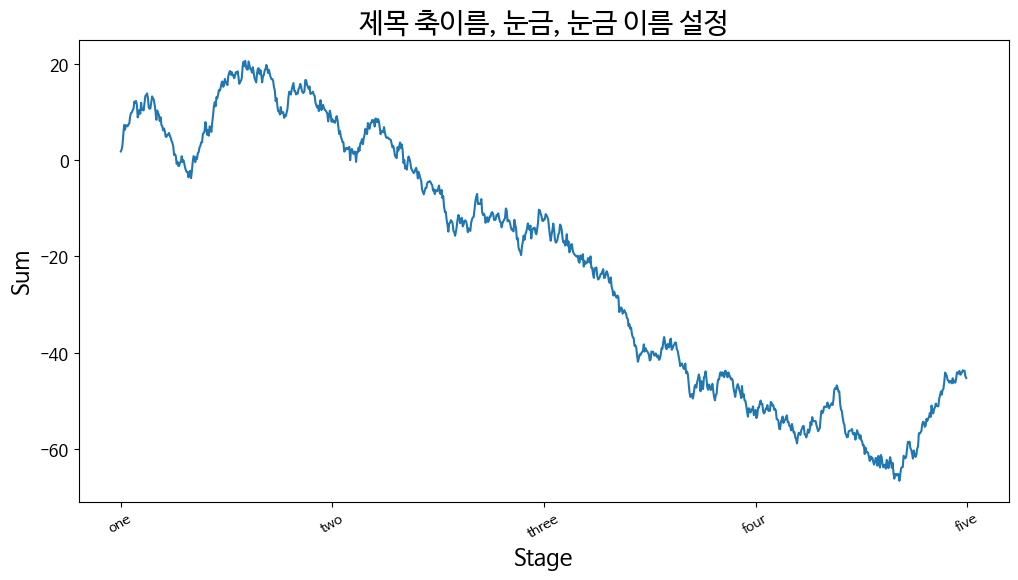

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30,fontsize='small')
ax.set_title('제목 축이름, 눈금, 눈금 이름 설정',size=20)
ax.set_xlabel('Stage',size=16)
ax.set_ylabel('Sum',size=16)
plt.show()

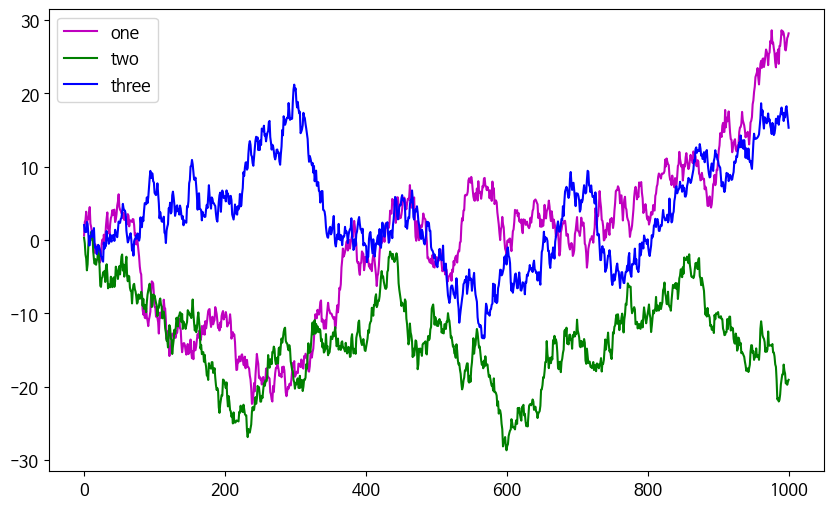

In [ ]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m',label='one')
ax.plot(randn(1000).cumsum(),'g',label='two')
ax.plot(randn(1000).cumsum(),'b',label='three')
plt.legend(loc='best')

Q. 카테고리별로 나뉘는 데이터를 생성하세요 (예: 다섯 가지 다른 과일의 판매량).
이 데이터를 사용하여 파이 차트를 그리세요.
파이 차트에서 각 섹션에 레이블을 추가하고, 한 섹션을 강조하세요 (예: 'explode' 기능 사용).
- sizes는 각 조각의 크기.
- explode는 위에서 정의된 'explode' 설정을 적용.
- labels는 각 조각에 대한 라벨을 지정.
- autopct='%1.1f%%'는 각 조각에 표시될 비율을 포맷합니다. 여기서 %1.1f%%는 소수점 한 자리까지 비율을 표시하라는 의미.
- shadow=True는 차트에 그림자를 추가.
- startangle=90는 첫 조각이 시작될 각도를 90도로 설정. 이는 차트가 위쪽에서 시작하도록 한다.

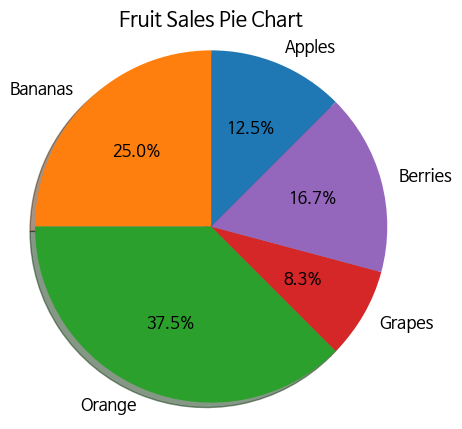

In [ ]:
# 파이 차트
import matplotlib.pyplot as plt
labels = 'Apples','Bananas','Orange','Grapes','Berries'
sizes = [15,30,45,10,20]
explode = (0,0,0,0,0)

plt.figure(figsize = (5,5))
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,startangle=45)
plt.axis('equal') # 차트가 원형으로 유지되도록 한다. 즉, 가로세로 비율이 같도록 설정
plt.title('Fruit Sales Pie Chart')
plt.show( )

In [ ]:
import seaborn as sns
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Q age컬럼을 범주화하여 파이차트로 작성하세요




*   범주화:'young'(10),'teen'(20),'adult'(45),'mature'(60),'elder'





[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        74.        ] 



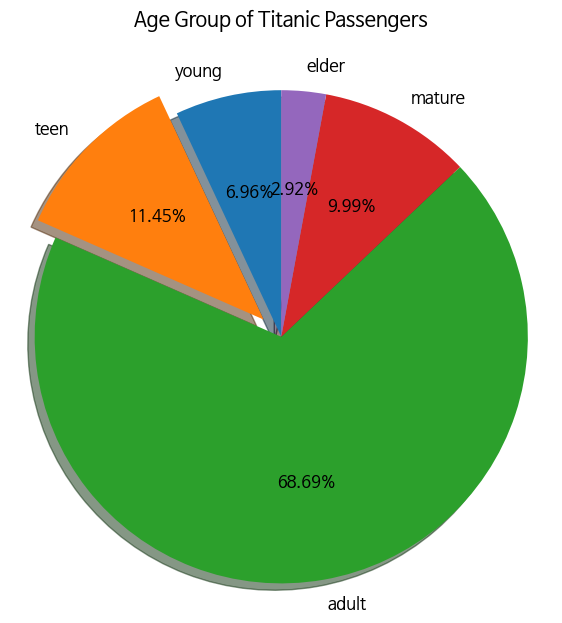

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)

print(df['age'].unique(),'\n')

df['age_group'] = pd.cut(df['age'],bins=[0,10,20,45,60,np.inf], labels=['young','teen','adult','mature','elder'], right=False)

age_group_counts = df['age_group'].value_counts().reindex(['young','teen','adult','mature','elder'],fill_value =0)

labels = age_group_counts.index
sizes = age_group_counts.values
explode = (0,0.1,0,0,0)

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Age Group of Titanic Passengers',pad=30)
plt.show()

In [ ]:
# 설치 후 세션 다시 시작
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum # NanumBarunGothic 글꼴을 설치
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib/ # Matplotlib 캐시를 지운다


In [1]:
from google.colab import files
uploaded = files.upload()

Saving 판타지.csv to 판타지 (1).csv


In [2]:
import pandas as pd
file_path = '판타지.csv'
data = pd.read_csv(file_path, index_col = 0)
data.head()

,u_cnt,reviewCount,ing,genre,author,publisher,users,free_info,uploaded,reaction
title,,,,,,,,,,
달빛조각사,"2,385","8,934",완결,판타지,남희성,(주)인타임,전체 이용가,50화,1450,4424
삼국지 호접몽전,"2,513","8,823",완결,판타지,청빙 최영진,청빙,전체 이용가,16화,404,3128
강철의 열제 2부 - 서울 정벌기,"1,715","3,580",완결,판타지,가우리,글로번,전체 이용가,15화,307,926
이계진입 리로디드 [독점],"1,636","5,972",완결,판타지,임경배,청어람,전체 이용가,18화,302,3904
아르세니아의 마법사 [독점],"1,271","4,207",완결,판타지,박성호,EDM북스,전체 이용가,18화,321,2608


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'free_info' 열을 문자열로 변환하고 숫자 추출
data['free_info'] = data['free_info'].astype(str).str.extract('(\d+)').astype(float)

# 변환 및 추출 후 'free_info' 열의 데이터 유형 확인
print(data['free_info'])



title
달빛조각사                           50.0
삼국지 호접몽전                        16.0
강철의 열제 2부 - 서울 정벌기              15.0
이계진입 리로디드 [독점]                  18.0
아르세니아의 마법사 [독점]                 18.0
                                ... 
빙의자는 사랑받는 우주속에서                 25.0
아카데미 속 엑스트라들의 우두머리가 되었다 [독점]    25.0
단역 최애캐를 살리고싶다 [독점]              25.0
중간보스의 심복으로 살아남기 [독점]            25.0
첫 번째 빙의자가 다시 쓰는 해피엔딩 [독점]       25.0
Name: free_info, Length: 2749, dtype: float64


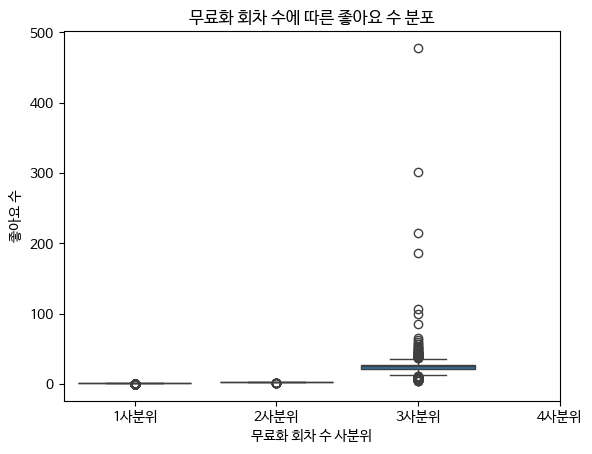

In [19]:
# 중복된 경계값 제거하여 유일한 값으로 구성된 배열 생성
# unique = np.unique()

# 무료화 회차 수를 사분위로 나누어 각 구간의 좋아요 수 비교
data['free_info_quartile'] = pd.qcut(data['free_info'], 4, labels=False, duplicates='drop')

# 인덱스 재 설정
data.reset_index(drop=True, inplace=True)

# 박스 플롯 생성
sns.boxplot(x=data['free_info_quartile'], y=data['free_info'])
plt.rc('font', family='NanumBarunGothic')
plt.xlabel('무료화 회차 수 사분위')
plt.ylabel('좋아요 수')
plt.title('무료화 회차 수에 따른 좋아요 수 분포')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1사분위', '2사분위', '3사분위', '4사분위'])  # x축 레이블 설정

plt.show()